<a href="https://colab.research.google.com/github/Chaitanya-Kumaria/UP-Electoral-stats/blob/main/Paper_presentation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Paper presentation.xlsx",header = 1)
df

,Unnamed: 0,Year,Election,Political Party,voteshare
0,NaN,1952,Lok Sabha,INC,64.91
1,NaN,1952,By Election,INC,42.93
2,NaN,1952,By Election,PSP,55.25
3,NaN,1957,Lok Sabha,Independent,49.49
4,NaN,1962,Lok Sabha,Independent,53.21
5,NaN,1967,Lok Sabha,Independent,32.34
6,NaN,1971,Lok Sabha,Independent,60.93
7,NaN,1977,Lok Sabha,BLD,70.96
8,NaN,1980,Lok Sabha,INC,45.49
9,NaN,1984,Lok Sabha,INC,56.92


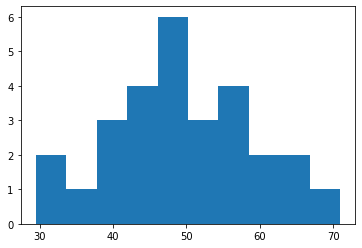

In [ ]:
plt.hist(df["voteshare"])
plt.show()

In [ ]:
df.describe()

,Unnamed: 0,Year,voteshare
count,0.0,28.000000,28.000000
mean,NaN,1988.035714,49.519643
std,NaN,20.336943,9.979098
min,NaN,1952.000000,29.480000
25%,NaN,1975.500000,44.182500
50%,NaN,1991.000000,48.680000
75%,NaN,2002.500000,55.935000
max,NaN,2019.000000,70.960000


In [ ]:
stats_label = ["mean_observed","variance observed","skew observed","kurt observed"]
stats_value = [round(df['voteshare'].mean(),2),round(df['voteshare'].var(),2),round(df['voteshare'].skew(),2),round(df['voteshare'].kurt(),2)]
print(set(zip(stats_label,stats_value)))

{('mean_observed', 49.52), ('variance observed', 99.58), ('kurt observed', -0.13), ('skew observed', 0.05)}


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


((array([-1.96943887, -1.56054088, -1.31312287, -1.12721645, -0.97379083,
         -0.84042553, -0.72056163, -0.61026134, -0.50693827, -0.40877122,
         -0.31440035, -0.2227547 , -0.13294629, -0.04419962,  0.04419962,
          0.13294629,  0.2227547 ,  0.31440035,  0.40877122,  0.50693827,
          0.61026134,  0.72056163,  0.84042553,  0.97379083,  1.12721645,
          1.31312287,  1.56054088,  1.96943887]),
  array([29.48, 32.34, 34.12, 38.46, 41.06, 41.92, 42.93, 44.6 , 45.49,
         45.88, 46.19, 46.73, 46.8 , 47.97, 49.39, 49.49, 52.19, 52.19,
         53.21, 55.25, 55.63, 56.85, 56.92, 59.51, 60.93, 64.91, 65.15,
         70.96])),
 (10.341804820962857, 49.51964285714286, 0.9951196389120596))

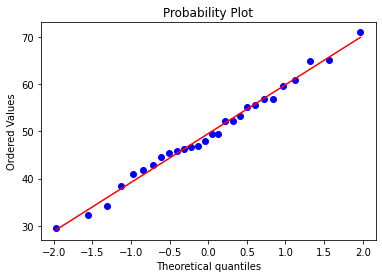

In [ ]:
stats.probplot(df["voteshare"],dist = "norm",plot = plt)

In [ ]:
n = 1/7

In [ ]:
import scipy.stats
for i in range(1,7):
  prob_intervals = [scipy.stats.norm.ppf(i*n,df['voteshare'].mean(),df['voteshare'].std())]
  print(prob_intervals)

[38.86625241270186]
[43.87198433082856]
[47.723281851160564]
[51.31600386312515]
[55.16730138345714]
[60.17303330158385]


In [ ]:
expec_freq = [4,4,4,4,4,4,4]
obs_freq = [4,3,6,3,3,5,4]

In [ ]:
from scipy.stats import chisquare
chisquare(obs_freq,expec_freq)

Power_divergenceResult(statistic=2.0, pvalue=0.9196986029286058)

In [ ]:
from scipy.stats import chi2
chi2.ppf(0.9,6)

10.644640675668422

We can Conclude that winners on this seat follow Normal distribution. and there is almost 92% confidence that a winnere in Kanpur will get between (29.4,70.9)
